Importing Libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Recommendor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display, Image




Loading the data

In [90]:
data = pd.read_csv('samsungMobilesData.csv')

#Creating a parquet file for it
data. to_parquet('samsungMobilesData.parquet')

data

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12
...,...,...,...,...,...,...,...,...,...,...,...
402,"SAMSUNG Galaxy M40 (Seawater Blue, 128 GB)",4.5,21490,https://rukminim2.flixcart.com/image/312/312/k...,32,other_types,3500,128,6,not mentioned,9
403,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,16199,https://rukminim2.flixcart.com/image/312/312/k...,25,other_types,4000,64,4,not mentioned,12
404,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,9000,https://rukminim2.flixcart.com/image/312/312/j...,13,other_types,3300,32,2,Snapdragon425P,8
405,"SAMSUNG Galaxy M01s (Gray, 32 GB)",4.2,10999,https://rukminim2.flixcart.com/image/312/312/k...,13,other_types,4000,32,3,MediaTek,9


Loading the new data

In [91]:
new_data = pd.read_csv('samsung_mobile_new_data.csv')

#Creating a parquet file for it
new_data. to_parquet('samsung_mobile_new_data.parquet')

new_data

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"₹9,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,"₹15,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBTotal Memory128 G...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",Battery Capacity5000 mAh
...,...,...,...,...,...,...,...,...,...,...
571,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,"₹16,199",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBSupported Memory C...,Operating SystemAndroid Pie 9.0Processor TypeE...,Primary Camera AvailableYesPrimary Camera25MP ...,Display Size16.26 cm (6.4 inch)Resolution1920 ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",Battery Capacity4000 mAh
572,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,"₹9,000",https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage32 GBRAM2 GBExpandable Storage...,Operating SystemAndroid Oreo 8.1Processor Type...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size15.24 cm (6 inch)Resolution720 x 1...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",Battery Capacity3300 mAhDual BatteryNo
573,"SAMSUNG Galaxy A71 (Prism Crush Black, 128 GB)",4.2,"₹34,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM8 GBExpandable Storag...,Operating SystemAndroid 10Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera64MP ...,Display Size17.02 cm (6.7 inch)Resolution2340 ...,"Network Type4G VOLTE, 4G, 3G, 2GSupported Netw...",Battery Capacity4500 mAh
574,"SAMSUNG Galaxy M01s (Gray, 32 GB)",NaN,"₹10,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Pie 9Processor TypeMed...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size15.75 cm (6.2 inch)Resolution720 x...,"Network Type4G VOLTE, 3GSupported Networks4G V...",Battery Capacity4000 mAhBattery Typelithium-ion


# Data Cleaning

Data cleaning for the new dataset

In [92]:
new_data['price'] = new_data['price'].str.replace('₹', '').str.replace(',', '').astype(int)


Split the 'storage_ram' field into 'internal_storage', 'ram', and 'expandable_storage'

In [93]:
new_data['internal_storage'] = new_data['storage_ram'].str.extract('Internal Storage(\d+) GB', expand=False).astype(float)
new_data['ram'] = new_data['storage_ram'].str.extract('RAM(\d+) GB', expand=False).astype(float)
new_data['expandable_storage'] = new_data['storage_ram'].str.extract('Expandable Storage(\d+) GB', expand=False).astype(float)

Split the 'os_processor' field into 'os' and 'processor_type'

In [94]:
new_data['os'] = new_data['os_processor'].str.extract('Operating System(.+?)Processor', expand=False).str.strip()
new_data['processor_type'] = new_data['os_processor'].str.extract('Processor Type(.+)', expand=False).str.strip()

Split the 'camera' field into 'primary_camera', 'secondary_camera', and 'flash_type'

In [95]:
new_data['primary_camera'] = new_data['camera'].str.extract('Primary Camera(\d+)MP', expand=False).astype(float)
new_data['secondary_camera'] = new_data['camera'].str.extract('Secondary Camera(\d+)MP', expand=False).astype(float)
new_data['flash_type'] = new_data['camera'].str.extract('Flash(.+?)', expand=False).str.strip()

Split the 'display' field into 'display_size', 'resolution', 'display_type', and 'other_display_features'

In [96]:
new_data['display_size'] = new_data['display'].str.extract('Display Size(.+?) cm', expand=False).str.replace('(', '').astype(float)
new_data['resolution'] = new_data['display'].str.extract('Resolution(.+?)Pixels', expand=False).str.strip()
new_data['display_type'] = new_data['display'].str.extract('Display Type(.+?)', expand=False).str.strip()

Split the 'network' field into 'network_type' and 'supported_networks'

In [97]:
new_data['network_type'] = new_data['network'].str.extract('Network Type(.+?)Supported', expand=False).str.strip()
new_data['supported_networks'] = new_data['network'].str.extract('Supported Networks(.+)', expand=False).str.strip()

Fill missing values in 'battery_capacity' with -1 before converting to integer

In [98]:
new_data['battery_capacity'] = new_data['battery'].str.extract('Battery Capacity(\d+) mAh', expand=False).fillna(-1).astype(int)

new_data

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery,...,processor_type,primary_camera,secondary_camera,flash_type,display_size,resolution,display_type,network_type,supported_networks,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo,...,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo,...,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo,...,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo,...,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBTotal Memory128 G...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",Battery Capacity5000 mAh,...,Qualcomm Snapdragon 750GProcessor CoreOcta Cor...,50.0,8.0,Y,16.76,2408 x 1080,F,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,16199,https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBSupported Memory C...,Operating SystemAndroid Pie 9.0Processor TypeE...,Primary Camera AvailableYesPrimary Camera25MP ...,Display Size16.26 cm (6.4 inch)Resolution1920 ...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",Battery Capacity4000 mAh,...,Exynos 7904Processor CoreOcta CorePrimary Cloc...,25.0,16.0,NaN,16.26,1920 x 1080,S,"3G, 4G, 2G","GSM, WCDMA, 4G LTEInternet Connectivity4G, Wi-...",4000
572,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,9000,https://rukminim2.flixcart.com/image/312/312/j...,Internal Storage32 GBRAM2 GBExpandable Storage...,Operating SystemAndroid Oreo 8.1Processor Type...,Primary Camera AvailableYesPrimary Camera13MP ...,Display Size15.24 cm (6 inch)Resolution720 x 1...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",Battery Capacity3300 

Drop the original columns

In [99]:
new_data.drop(['storage_ram', 'os_processor', 'camera', 'display', 'network', 'battery'], axis=1, inplace=True)

new_data

,name,ratings,price,imgURL,internal_storage,ram,expandable_storage,os,processor_type,primary_camera,secondary_camera,flash_type,display_size,resolution,display_type,network_type,supported_networks,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,64.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,R,16.76,2408 x 1080,F,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,6.0,NaN,Android 12,Qualcomm Snapdragon 750GProcessor CoreOcta Cor...,50.0,8.0,Y,16.76,2408 x 1080,F,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,16199,https://rukminim2.flixcart.com/image/312/312/k...,64.0,4.0,NaN,Android Pie 9.0,Exynos 7904Processor CoreOcta CorePrimary Cloc...,25.0,16.0,NaN,16.26,1920 x 1080,S,"3G, 4G, 2G","GSM, WCDMA, 4G LTEInternet Connectivity4G, Wi-...",4000
572,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,9000,https://rukminim2.flixcart.com/image/312/312/j...,32.0,2.0,512.0,Android Oreo 8.1,Qualcomm Snapdragon SD425Processor CoreQuad Co...,13.0,5.0,F,15.24,NaN,T,"3G, 4G, 2G","GSM, WCDMA, 4G LTEInternet Connectivity4G, 3G,...",3300
573,"SAMSUNG Galaxy A71 (Prism Crush Black, 128 GB)",4.2,34999,https://rukminim2.flixcart.com/image/312/312/k...,128.0,8.0,512.0,Android 10,Qualcomm SM7150Processor CoreOcta CorePrimary ...,64.0,32.0,R,17.02,2340 x 1080,S,"4G VOLTE, 4G, 3G, 2G","4G VoLTE, 4G LTE, WCDMA, GSMGPRSYesPre-install...",4500
574,"SAMSUNG Galaxy M01s (Gray, 32 GB)",NaN,10999,https://rukminim2.flixcart.com/image/312/312/k...,32.0,3.0,512.0,Android Pie 9,MediaTek | MT6762 octa coreProcessor CoreOcta ...,13.0,8.0,b,15.75,720 x 1520$$,NaN,"4G VOLTE, 3G","4G VoLTE, GSMInternet Connectivity2G GSM, 3G W...",4000


# Average rating and price for each smartphone model

Concatenate the original dataset and the new dataset

In [100]:
combined_data = pd.concat([data, new_data], ignore_index=True)


Average rating and price for each smartphone model

In [101]:
average_rating_price = combined_data.groupby('name')[['ratings', 'price']].mean()

average_rating_price

,ratings,price
name,,
"OPPO Reno10 5G (Ice Blue, 256 GB)",4.2500,32999.0
"OPPO Reno10 5G (Silvery Grey, 256 GB)",4.2125,32999.0
SAMSUNG 1215,NaN,2099.0
"SAMSUNG A04 E (Copper, 128 GB)",4.1000,11499.0
"SAMSUNG A04 e (Copper, 64 GB)",4.1000,9999.0
...,...,...
SAMSUNG Metro B313E Dual Sim - White,4.2000,2299.0
"SAMSUNG On5 (Black, 8 GB)",4.3000,5499.0
"SAMSUNG S22 Ultra 5G (Burgundy, 256 GB)",4.3000,56231.0


## Distribution of Smartphone Prices

Setting a sns style

In [102]:
sns.set_style('whitegrid')

Create a figure with two subplots

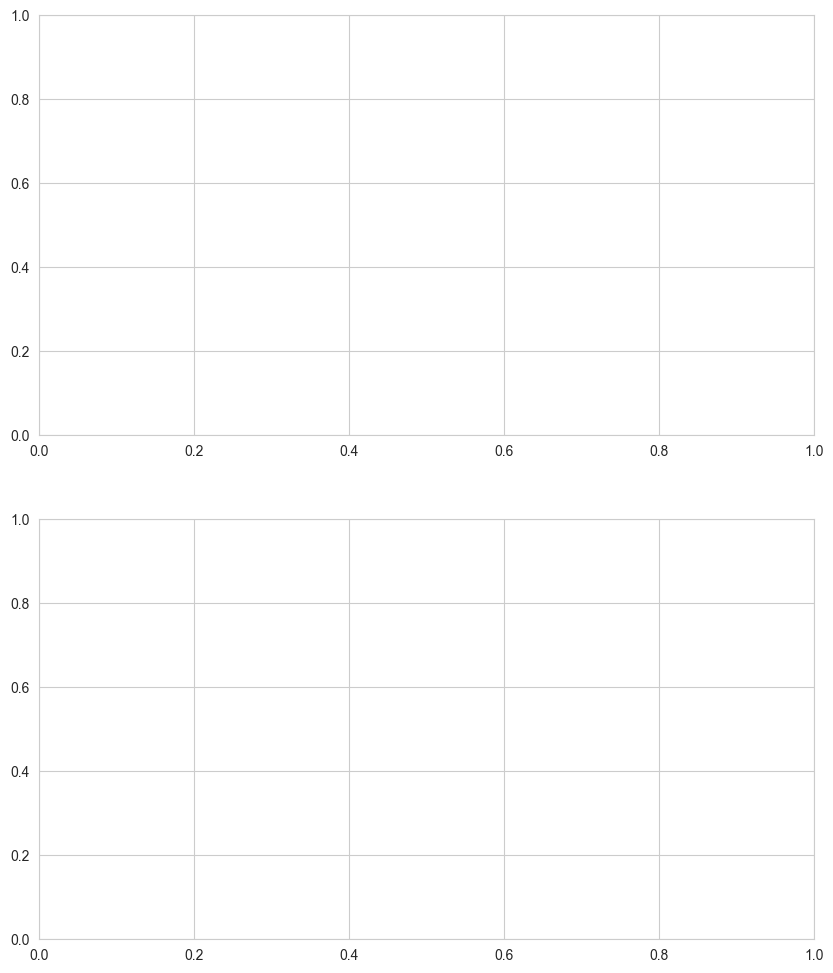

In [103]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

Histogram of prices

In [107]:
sns.histplot(combined_data['price'], bins=30, ax=ax1)
ax1.set_title('Distribution of Smartphone Prices')
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')

plt.show()



Scatter plot of prices and ratings

In [105]:
sns.scatterplot(data=combined_data, x='price', y='ratings', ax=ax2)
ax2.set_title('Price vs Ratings')
ax2.set_xlabel('Price')
ax2.set_ylabel('Ratings')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Display the plots

In [106]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Recommendor

Select numeric features

In [109]:
features = ['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'secondary_camera', 'display_size', 'battery_capacity']
data_subset = combined_data[features]

Handle missing values by filling them with the mean value of each column

In [110]:
data_subset = data_subset.fillna(data_subset.mean())

Standardize the features

In [111]:
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset)

Compute the cosine similarity for the first 5 products

In [112]:
similarity_matrix = cosine_similarity(data_subset_scaled[:5])

similarity_matrix

array([[1.        , 0.99954149, 0.99954149, 0.99954149, 0.59585076],
       [0.99954149, 1.        , 1.        , 1.        , 0.58700707],
       [0.99954149, 1.        , 1.        , 1.        , 0.58700707],
       [0.99954149, 1.        , 1.        , 1.        , 0.58700707],
       [0.59585076, 0.58700707, 0.58700707, 0.58700707, 1.        ]])

This matrix tells us how similar each product is to each other product. For example, the similarity between the first product and itself is 1 (as expected), and the similarity between the first product and the second product is 0.999, indicating they are very similar.

### Getting Product Recommendation based on model

Function to recommend products

In [115]:
def recommend_products(product_name, data, features, num_recommendations=5):
    # Fill missing values with the mean value of each column
    data = data.fillna(data.mean())
    
    # Select the specified features and standardize them
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    
    # Create a DataFrame from the scaled data
    data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=features)
    
    # Compute the cosine similarity matrix
    similarity_matrix = cosine_similarity(data_scaled)
    
    # Create a Series from the similarity matrix using the product names as the index
    product_similarities = pd.Series(similarity_matrix[data.index[data['name'] == product_name][0]], index=data['name'])
    
    # Get the top products with the highest cosine similarity
    top_products = product_similarities.sort_values(ascending=False).head(num_recommendations + 1)
    
    # Remove the input product itself from the recommendations
    top_products = top_products.iloc[1:]
    
    return top_products

# Dropdown widget for product selection
product_dropdown = widgets.Dropdown(
    options=combined_data['name'].unique(),
    description='Product:',
    disabled=False,)

In [116]:
# Button to trigger the recommendation
recommend_button = widgets.Button(description='Recommend')

# Output widget to display the recommendations
output = widgets.Output()

display(product_dropdown, recommend_button, output)

Dropdown(description='Product:', options=('SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)', 'SAMSUNG Galaxy F13 (W…

Button(description='Recommend', style=ButtonStyle())

Output()

In [ ]:
def recommend(button):
    # Clear previous output
    output.clear_output()
    
    # Get selected product
    product_name = product_dropdown.value

    # Get recommendations
    features = ['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'secondary_camera', 'display_size', 'battery_capacity']
    recommendations = recommend_products(product_name, combined_data, features)
    
    # Display recommendations
    with output:
        for product in recommendations.index:
            img_url = combined_data.loc[combined_data['name'] == product, 'imgURL'].values[0]
            display(Image(url=img_url))
            print(f"Product: {product}, Similarity Score: {recommendations[product]}")

recommend_button.on_click(recommend)